## Gear Downshift Distance from Corners - All visualizations 

Note: Required dependencies are listed in requirements.txt

### Module imports and common variable declarations

In [11]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib import cm

In [12]:
gp_locations = [
    'bahrain',
    'italy',
    'portugal',
    'spain',
    'monaco',
    'azerbaijan',
    'france',
    'austria',
    'great britain',
    'hungary',
    'belgium',
    'russia',
    'turkey',
]

common_drivers = [
    'LEC',
    'GAS',
    'STR',
    'PER',
    'RUS',
    'MSC',
    'OCO',
    'NOR',
    'BOT',
    'ALO',
    'HAM',
    'RIC',
    'MAG',
    'SAI',
    'ZHO',
    'TSU',
    'VER',
    'LAT',
    'ALB'
]

### Plot for Downshift distance from the corner vs Final Position of the Driver

Text(0.5, 1.0, 'Final Position of the Driver vs Downshift distance from corner')

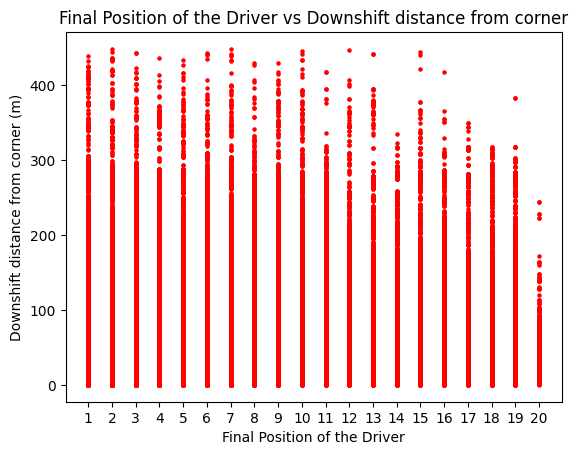

In [13]:
df = pd.read_csv(f'./saved_csv_files/out_bahrain.csv')
for location in gp_locations[:11]:
    temp_df = pd.read_csv(f'./saved_csv_files/out_{location}.csv')
    temp_df.columns = ['Unnamed: 0'] + [str(int(float(col))) for col in temp_df.columns[1:]] 
    df = pd.concat([df, temp_df], ignore_index=True) # concatenating dataframes for all grand prix races


for i, column in enumerate(df.columns):
    if column != 'Unnamed: 0':
        values = np.ma.masked_invalid(df[column]).compressed()
        values = values / 10 # dividing by constant for showing actual values 
        indices = [column] * len(values)
        plt.scatter(indices, values, label=column, marker='o', s=5, color='red') # plotting distance values for each final position

plt.xlabel('Final Position of the Driver')
plt.ylabel('Downshift distance from corner (m)')
plt.title('Final Position of the Driver vs Downshift distance from corner')

### Visualization of the gears used by a driver in a specific lap

core           INFO 	Loading data for Styrian Grand Prix - Qualifying [v3.1.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '44', '4', '11', '10', '16', '22', '14', '18', '63', '55', '3', '5', '99', '6', '31', '7', '47', '9']
C:\Users\Sushaanth\AppData\Local\Temp\ipykernel_19340\4135102911.py:17: MatplotlibDeprecationWarning: The get_c

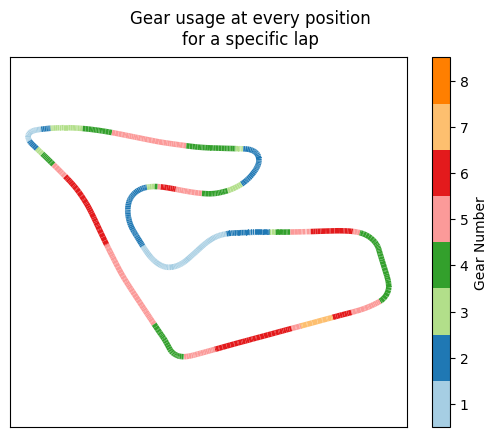

In [14]:
session = fastf1.get_session(2021, 'austria', 'Q')
session.load()

laps = session.laps.pick_drivers(common_drivers)
circuit_info = session.get_circuit_info()


lap = laps.iloc[3] # picking a lap
tel = lap.get_telemetry()
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float) # getting gear data

cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Gear usage at every position\nfor a specific lap")

cbar = plt.colorbar(mappable=lc_comp, label="Gear Number", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

### Visualization of corner positions and downshift positions

core           INFO 	Loading data for Styrian Grand Prix - Qualifying [v3.1.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '77', '44', '4', '11', '10', '16', '22', '14', '18', '63', '55', '3', '5', '99', '6', '31', '7', '47', '9']


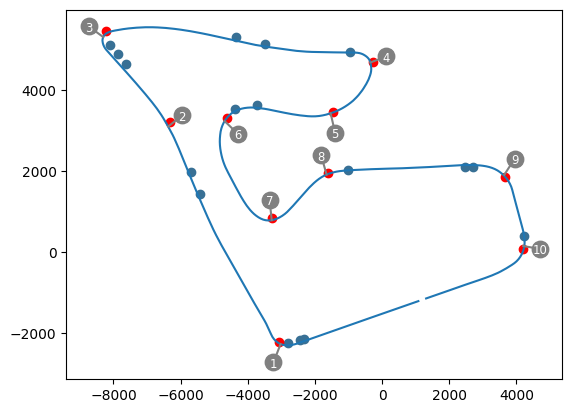

In [15]:
def trunc(values, decs=0):
    """trunc truncates the input numpy array with decimal values to the given number of decimal places.

    :param values: values to be truncated
    :type values: Numpy Array
    :param decs: number of decimal places to retain while truncation, defaults to 0
    :type decs: int, optional
    :return: truncated values
    :rtype: Numpy array
    """

    return np.trunc(values*10**decs)/(10**decs)


def rotate(xy, *, angle):
    """rotate gives the coordinates for a point rotated at a certain angle
    """
    
    rot_mat = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)


def plot_gear_on_track(lap, circuit_info):
    """plot_track_with_info plots an image of the track with the gear information at each point at the track.

    :param lap: lap under consideration
    :type lap: lap object from fastf1
    :param circuit_info: information about the circuit
    :type circuit_info: object from fastf1
    """

    pos = lap.get_pos_data()
    track = pos.loc[:, ('X', 'Y')].to_numpy()
    track_angle = circuit_info.rotation / 180 * np.pi
    rotated_track = rotate(track, angle=track_angle)
    plt.plot(rotated_track[:, 0], rotated_track[:, 1])

    return track_angle


def plot_corners_and_downshifts(location, year, driver_list):
    session = fastf1.get_session(year, location, 'Q') # pulling data from fastf1
    session.load()

    laps = session.laps.pick_drivers(driver_list) # getting data for all laps

    circuit_info = session.get_circuit_info()
    offset_vector = [500, 0] # for plotting the corner number at an offset distance from the corner point

    lap = laps.iloc[2]
    track_angle = plot_gear_on_track(lap, circuit_info)

    corner_positions = []
    corner_dict = {}

    for _, corner in circuit_info.corners.iterrows(): # iterating over circuit information and saving all corners
        corner_positions.append([corner['X'], corner['Y']])
        corner_x, corner_y = trunc(corner['X'],2), trunc(corner['Y'],2)
        corner_dict[(corner_x, corner_y)] = corner['Number']

        txt = f"{corner['Number']}{corner['Letter']}"
        offset_angle = corner['Angle'] / 180 * np.pi
        offset_x, offset_y = rotate(offset_vector, angle=offset_angle)
        text_x = corner['X'] + offset_x
        text_y = corner['Y'] + offset_y
        text_x, text_y = rotate([text_x, text_y], angle=track_angle)
        track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)
        plt.scatter(text_x, text_y, color='grey', s=140)
        plt.plot([track_x, text_x], [track_y, text_y], color='grey')
        plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')

    corner_positions = np.asarray(corner_positions, dtype=np.float32)
    tel = lap.get_telemetry() # getting telemetry data 

    x = np.array(tel['X'].values)
    y = np.array(tel['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    gear = tel['nGear'].to_numpy().astype(float) # getting gear number for all segments of the track

    downshift_positions = []
    for i in range(len(segments)):
        if gear[i] != gear[i+1] and gear[i] > gear[i+1]:
            downshift_positions.append(segments[i][1])
    downshift_positions = np.asarray(downshift_positions, dtype=np.float32) # finding positions where downshifts occured

    downshift_positions = trunc(downshift_positions, 2)
    corner_positions = trunc(corner_positions,2)

    for downshift in downshift_positions:
        plt.scatter(downshift[0], downshift[1], color='#387095') # plotting downshift points
    
    for corner in corner_positions:
        plt.scatter(corner[0], corner[1], color='red') # plotting corner points

    plt.show()

plot_corners_and_downshifts('austria', 2021, common_drivers)